In [1]:
## preparation

# some common imports
import importlib

# import hyptrails
import trails.hyptrails
importlib.reload(trails.hyptrails)
from trails.hyptrails import *

# numpy 
import numpy as np

# prepare plotting
%matplotlib inline

# set figure size; src: http://txt.arboreus.com/2012/12/13/change-figure-size-in-ipython-notebook-sessions.html
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 15, 8

# import matplotlib
import matplotlib.pyplot as plt

# prepare illustration
%load_ext tikzmagic

In [2]:
data = np.array([[0.0,10,0,20],[20,0,10,0],[0,20,0,10],[10,0,20,0]])
data

array([[  0.,  10.,   0.,  20.],
       [ 20.,   0.,  10.,   0.],
       [  0.,  20.,   0.,  10.],
       [ 10.,   0.,  20.,   0.]])

In [3]:
data_red = np.array([[0.0,10,0,0],[0,0,10,0],[0,0,0,10],[10,0,0,0]])
data_red

array([[  0.,  10.,   0.,   0.],
       [  0.,   0.,  10.,   0.],
       [  0.,   0.,   0.,  10.],
       [ 10.,   0.,   0.,   0.]])

In [4]:
data_blue = np.array([[0.0,0,0,20],[20,0,0,0],[0,20,0,0],[0,0,20,0]])
data_blue

array([[  0.,   0.,   0.,  20.],
       [ 20.,   0.,   0.,   0.],
       [  0.,  20.,   0.,   0.],
       [  0.,   0.,  20.,   0.]])

In [5]:
data_male = data / 2
data_female = data / 2

In [6]:
data_red_male = data_red / 2
data_red_female = data_red / 2
data_blue_male = data_blue / 2
data_blue_female = data_blue / 2

In [7]:
import trails.utils as utils 
tp_data = utils.norm1_2d(data)
tp_data

array([[ 0.        ,  0.33333333,  0.        ,  0.66666667],
       [ 0.66666667,  0.        ,  0.33333333,  0.        ],
       [ 0.        ,  0.66666667,  0.        ,  0.33333333],
       [ 0.33333333,  0.        ,  0.66666667,  0.        ]])

In [8]:
tp_uniform = utils.norm1_2d(np.ones((4,4)))
tp_uniform

array([[ 0.25,  0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25,  0.25]])

In [9]:
tp_equal = np.array([[0.0,1,0,1],[1,0,1,0],[0,1,0,1],[1,0,1,0]])
tp_equal

array([[ 0.,  1.,  0.,  1.],
       [ 1.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  1.],
       [ 1.,  0.,  1.,  0.]])

In [10]:
tp_clock = utils.norm1_2d(np.array([[0,0,0,1],[1,0,0,0],[0,1,0,0],[0,0,1,0]]))
tp_clock

array([[ 0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.]])

In [11]:
tp_counter = utils.norm1_2d(np.array([[0,1,0,0],[0,0,1,0],[0,0,0,1],[1,0,0,0]]))
tp_counter

array([[ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.]])

In [12]:
from collections import OrderedDict

kappas = [0.001,0.003, 0.01, 0.03, 0.1, 0.3,1,2,3,4,5,6,7,8,9,10,30,100,300,1000,3000,10000]
exp = OrderedDict()


exp["data"] = evidence_markov_kappas(data, tp_data, [k * data.shape[0] for k in kappas])
exp["uniform"] = evidence_markov_kappas(data, tp_uniform, [k * data.shape[0] for k in kappas])

#exp["equal"] = evidence_markov_kappas(data, tp_equal, [k * data.shape[0] for k in kappas])


exp["red-counter_blue-clock"] = evidence_groups_kappas(np.array([data_red, data_blue]), np.array([tp_counter, tp_clock]), [k * data.shape[0] for k in kappas])
exp["red-uniform_blue-uniform"] = evidence_groups_kappas(np.array([data_red, data_blue]), np.array([tp_uniform, tp_uniform]), [k * data.shape[0] for k in kappas])
exp["red-data_blue-data"] = evidence_groups_kappas(np.array([data_red, data_blue]), np.array([tp_data, tp_data]), [k * data.shape[0] for k in kappas])

#exp["red-clock_blue-counter"] = evidence_groups_kappas(np.array([data_red, data_blue]), np.array([tp_clock, tp_counter]), [k * data.shape[0] for k in kappas])

#exp["female-clock_male-counter"] = evidence_groups_kappas(np.array([data_male, data_female]), np.array([tp_clock, tp_counter]), [k * data.shape[0] for k in kappas])
#exp["female-data_male-data"] = evidence_groups_kappas(np.array([data_male, data_female]), np.array([tp_data, tp_data]), [k * data.shape[0] for k in kappas])
exp["female-uniform_male-uniform"] = evidence_groups_kappas(np.array([data_male, data_female]), np.array([tp_uniform, tp_uniform]), [k * data.shape[0] for k in kappas])

cart_data = np.array([data_red_female, data_red_male, data_blue_female, data_blue_male])

exp["cart_uniform"] = evidence_groups_kappas(cart_data, np.array([tp_uniform, tp_uniform, tp_uniform, tp_uniform]), [k * data.shape[0] for k in kappas])
exp["cart_data"] = evidence_groups_kappas(cart_data, np.array([tp_data, tp_data, tp_data, tp_data]), [k * data.shape[0] for k in kappas])

exp["cart_female-uniform_male-uniform"] = evidence_groups_kappas(cart_data, np.array([tp_uniform, tp_uniform, tp_uniform, tp_uniform]), [k * data.shape[0] for k in kappas])
#exp["cart_female-data_male-data"] = evidence_groups_kappas(cart_data, np.array([tp_data, tp_data, tp_data, tp_data]), [k * data.shape[0] for k in kappas])
#exp["cart_female-clock_male-counter"] = evidence_groups_kappas(cart_data, np.array([tp_clock, tp_counter, tp_clock, tp_counter]), [k * data.shape[0] for k in kappas])

#exp["cart_red-data_blue-data"] = evidence_groups_kappas(cart_data, np.array([tp_data, tp_data, tp_data, tp_data]), [k * data.shape[0] for k in kappas])
#exp["cart_red-clock_blue-counter"] = evidence_groups_kappas(cart_data, np.array([tp_clock, tp_clock, tp_counter, tp_counter]), [k * data.shape[0] for k in kappas])
exp["cart_red-counter_blue-clock"] = evidence_groups_kappas(cart_data, np.array([tp_counter, tp_counter, tp_clock, tp_clock]), [k * data.shape[0] for k in kappas])
exp["cart_red-uniform_blue-uniform"] = evidence_groups_kappas(cart_data, np.array([tp_uniform, tp_uniform, tp_uniform, tp_uniform]), [k * data.shape[0] for k in kappas])
exp["cart_red-data_blue-data"] = evidence_groups_kappas(cart_data, np.array([tp_data, tp_data, tp_data, tp_data]), [k * data.shape[0] for k in kappas])



[-22.59869534 -29.8900933 ]
[-22.54840645 -29.83614059]
[-22.375012   -29.64995269]
[-21.90064911 -29.13929161]
[-20.44339252 -27.55788599]
[-17.3928082  -24.17561802]
[-11.86697895 -17.70280679]
[ -8.34795499 -13.21910189]
[ -6.48146793 -10.66463704]
[-5.3092525  -8.97616655]
[-4.50068625 -7.76553077]
[-3.90790273 -6.85056904]
[-3.454131   -6.13275408]
[-3.09534437 -5.55357199]
[-2.80441277 -5.07586402]
[-2.56367786 -4.6748047 ]
[-0.94540971 -1.82174253]
[-0.29485632 -0.582641  ]
[-0.09942066 -0.19802439]
[-0.02994761 -0.05982066]
[-0.00999417 -0.01998002]
[-0.00299947 -0.0059982 ]
[-22.63379657 -29.9332184 ]
[-22.65343357 -29.96523096]
[-22.72193681 -30.07699115]
[-22.91574524 -30.39390029]
[-23.57263447 -31.47600901]
[-25.28586934 -34.35807684]
[-29.91041697 -42.60895347]
[-34.33505495 -51.24752614]
[-37.37571782 -57.68795249]
[-39.61594971 -62.74080202]
[-41.34404724 -66.84116987]
[-42.72185973 -70.25093385]
[-43.84830456 -73.13996706]
[-44.78766292 -75.62451844]
[-45.58370791 -77.

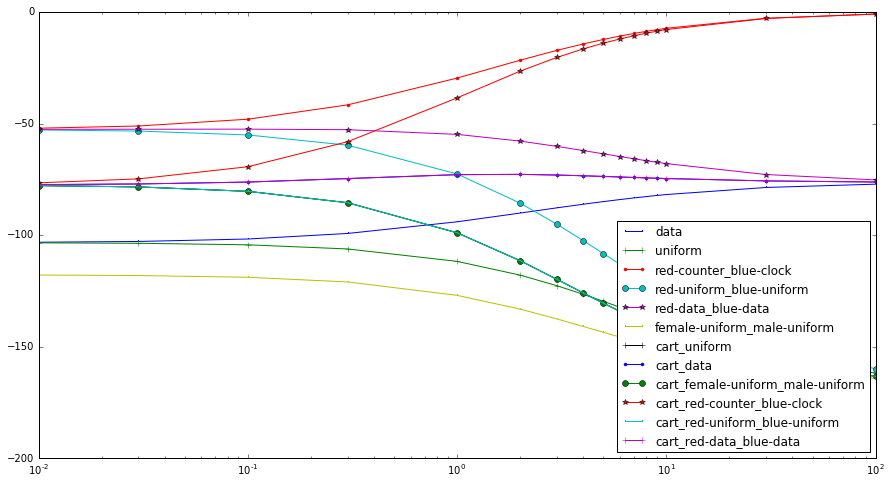

In [13]:
import itertools
marker = itertools.cycle((',','+','.','o','*'))

fig, ax = plt.subplots(1,1)
for key, values in exp.items():
    ax.plot(kappas, values,  marker = next(marker), label= key)
    
ax.set_ylim([-200,0])
ax.set_xlim([0.01,100])

plt.xscale('log')
plt.legend(loc = "lower right")

In [15]:
import trails.db as db
importlib.reload(db)
import pymysql
pymysql.install_as_MySQLdb()
con = pymysql.connect(
    host='localhost',
    port=3306,
    user='user',
    password='password',
    db='db')

name = "mixedtrails-toy"
#name = "mixedtrails-synth-homo"
#name = "mixedtrails-synth-mem"
#name = "mixedtrails-synth-exp"
for k, v in exp.items():
    print(k)
    db.write(name, k, kappas, v, con, table="results_mixed_trails", replace=True)

con.close()

OperationalError: (2003, "Can't connect to MySQL server on 'localhost' ([Errno 111] Connection refused)")